<a href="https://colab.research.google.com/github/trinhminhtris/ANN/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.utils import to_categorical
from keras.utils import load_img

170498071/170498071 [==============================] - 3s 0us/step


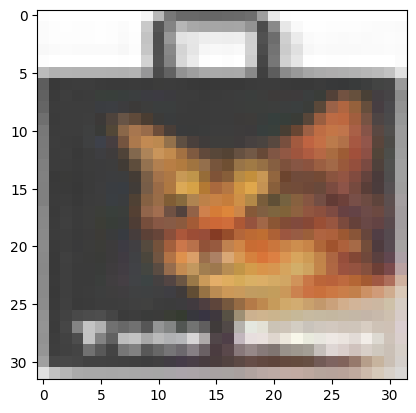

Số:  [3]


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
digit = x_train[3000]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print('Số: ', y_train[3000])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

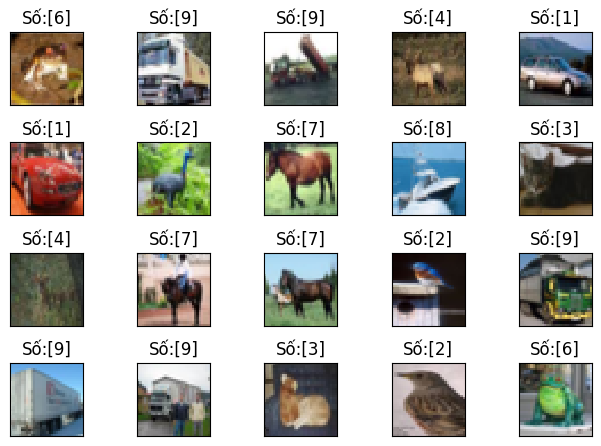

In [ ]:
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('Số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
model = Sequential()
# Tạo các lớp ẩn
model.add(Dense(5000, activation = 'relu', input_shape = (32 * 32 * 3, )))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
# Output
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_2 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 33,920,610
Trainable params: 33,920,610
No

In [ ]:
X = x_test
Y = y_test

In [ ]:
x_train = x_train.reshape(50000, 32*32*3)

# chuyển ảnh có dữ liệu của mỗi pixel 0 ->255 thành ảnh xám 0 -> 1
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(50000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mất mát: ', test_loss)
print('Độ chính xác: ', test_acc)

Epoch 1/10
391/391 [==============================] - 392s 999ms/step - loss: 2.3456 - accuracy: 0.2057
Epoch 2/10
391/391 [==============================] - 402s 1s/step - loss: 1.8933 - accuracy: 0.3081
Epoch 3/10
391/391 [==============================] - 396s 1s/step - loss: 1.7951 - accuracy: 0.3518
Epoch 4/10
391/391 [==============================] - 388s 991ms/step - loss: 1.7203 - accuracy: 0.3813
Epoch 5/10
391/391 [==============================] - 395s 1s/step - loss: 1.6627 - accuracy: 0.4035
Epoch 6/10
391/391 [==============================] - 395s 1s/step - loss: 1.6181 - accuracy: 0.4207
Epoch 7/10
391/391 [==============================] - 406s 1s/step - loss: 1.5725 - accuracy: 0.4393
Epoch 8/10
391/391 [==============================] - 401s 1s/step - loss: 1.5352 - accuracy: 0.4515
Epoch 9/10
391/391 [==============================] - 394s 1s/step - loss: 1.4995 - accuracy: 0.4647
Epoch 10/10
313/313 [==============================] - 26s 82ms/step - loss: 1.4975 -

In [ ]:
model.save('test1.h5')

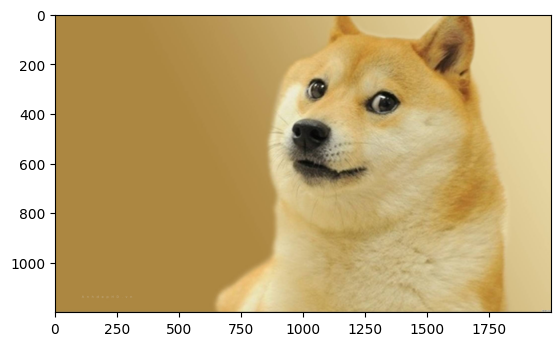

In [ ]:
img = plt.imread('/content/drive/MyDrive/AI/dog image.jpg')
plt.imshow(img)

In [ ]:
from keras.utils import load_img, img_to_array
img1 = load_img('/content/drive/MyDrive/AI/dog image.jpg', target_size = (32, 32))
plt.imshow(img1)
img1 = img_to_array(img)
img1 = img1.reshape(1, 32*32*3)
img1 = img1.astype('float32')
img1 = img1/255
np.argmax(model.predict(img1), axis = -1)